In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preperation

In [3]:
df1= pd.read_csv("aqarmap_data/aqarmap_data1.csv")
df2= pd.read_csv("aqarmap_data/aqarmap_data2.csv")
df3= pd.read_csv("aqarmap_data/aqarmap_data3.csv")

In [4]:
print(df1.info())
df1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   URL        1497 non-null   object 
 1   Price      1497 non-null   object 
 2   Address    1486 non-null   object 
 3   Rooms      1461 non-null   float64
 4   Baths      1461 non-null   float64
 5   Area       1497 non-null   int64  
 6   Lat        1484 non-null   float64
 7   Lon        1484 non-null   float64
 8   Floor      1444 non-null   object 
 9   Finishing  1445 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 117.1+ KB
None


,URL,Price,Address,Rooms,Baths,Area,Lat,Lon,Floor,Finishing
0,https://aqarmap.com.eg/ar/listing/5923848-for-...,"7,900,000\n جنيه",القاهرة الكبرى / كمبوند تراس - بنك الاسكان و...,3.0,3.0,176,30.015287,30.983945,4,نصف تشطيب
1,https://aqarmap.com.eg/ar/listing/6511345-for-...,"1,550,000\n جنيه",القاهرة الكبرى / منطقة أ,2.0,2.0,95,29.986745,31.099302,NaN,NaN
2,https://aqarmap.com.eg/ar/listing/6108263-for-...,"13,000,000\n جنيه",القاهرة الكبرى / طريق مدينتي,4.0,4.0,245,30.100866,31.632139,1,سوبر لوكس


In [5]:
print(df2.info())
df2.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   URL        1804 non-null   object 
 1   Price      1804 non-null   object 
 2   Address    1359 non-null   object 
 3   Rooms      1648 non-null   float64
 4   Baths      1648 non-null   float64
 5   Area       1729 non-null   float64
 6   Lat        1729 non-null   float64
 7   Lon        1729 non-null   float64
 8   Floor      1588 non-null   object 
 9   Finishing  1589 non-null   object 
dtypes: float64(5), object(5)
memory usage: 141.1+ KB
None


,URL,Price,Address,Rooms,Baths,Area,Lat,Lon,Floor,Finishing
0,https://aqarmap.com.eg/ar/listing/6495695-for-...,"5,000,000 جنيه",القاهرة الكبرى / شارع تاجان,4.0,3.0,500.0,30.062840,31.467344,1,نصف تشطيب
1,https://aqarmap.com.eg/ar/listing/6620952-for-...,"5,200,000 جنيه",NaN,3.0,3.0,154.0,30.091361,31.379453,2,اكسترا سوبر لوكس
2,https://aqarmap.com.eg/ar/listing/6625833-for-...,"9,000,000 جنيه",القاهرة الكبرى / شارع 256,4.0,3.0,250.0,29.967712,31.269590,10,اكسترا سوبر لوكس


In [6]:
print(df3.info())
df3.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   URL        8553 non-null   object 
 1   Price      8553 non-null   object 
 2   Address    8553 non-null   object 
 3   Area       8553 non-null   float64
 4   Rooms      7933 non-null   float64
 5   Baths      7248 non-null   float64
 6   Lat        8083 non-null   float64
 7   Lon        8083 non-null   float64
 8   Floor      7125 non-null   object 
 9   Finishing  7125 non-null   object 
dtypes: float64(5), object(5)
memory usage: 668.3+ KB
None


,URL,Price,Address,Area,Rooms,Baths,Lat,Lon,Floor,Finishing
0,https://aqarmap.com.eg/ar/listing/6586177-for-...,"5,000,000 جنيه",الاسكندرية / شارع أبو قير - طريق الحرية,140.0,1.0,2.0,31.245682,29.954224,4,سوبر لوكس
1,https://aqarmap.com.eg/ar/listing/6588316-for-...,"3,640,000 جنيه",القاهرة الكبرى / الحي الأول,260.0,3.0,3.0,30.083355,31.552734,2,نصف تشطيب
2,https://aqarmap.com.eg/ar/listing/6588088-for-...,"1,265,000 جنيه",القاهرة الكبرى / شارع الملك فيصل,150.0,3.0,3.0,30.016787,31.184692,3,بدون تشطيب


In [7]:
def Outliers(data,rows,cols):    

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(data):
        df[col].plot(kind="box", ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


## Data wrangling

In [25]:
def wrangle(file):
    # reading the csv file
    df = pd.read_csv(file)
    
    # converting Price and floor columns to float
    df["Price"] = (
    df["Price"].str
    .replace("/n    ","").str
    .replace("جنيه","").str
    .replace(",","")
    .astype(float)
    )
    df["Floor"] = df["Floor"].str.replace("الارضي","0").astype(float)

    # splitting the address to Governate and Neighbourhood
    df["Governate"] = df["Address"].str.split("/",expand=True)[0]
    df["Neighbourhood"] = df["Address"].str.split("/",expand=True)[1].str.split("-",expand=True)[0]
    df.drop("Address",axis=1,inplace=True)
    # List of valid governorates in Egypt
    valid_governates = [
        'القاهرة', 'الجيزة', 'الاسكندرية', 'المنيا', 'القليوبية', 
        'الشرقية', 'المنوفية', 'الدقهلية', 'البحر الأحمر', 'أسوان', 
        'الأقصر', 'سوهاج', 'كفر الشيخ', 'بني سويف', 'الفيوم', 
        'الوادي الجديد', 'جنوب سيناء', 'شمال سيناء', 'بورسعيد', 
        'السويس', 'الإسماعيلية', 'مطروح', 'دمياط', 'الدهب', 
        'الساحل الشمالي', 'العين السخنة'
    ]
    # Normalize the format of "Governate"
    df["Governate"] = df["Governate"].str.strip()

    # Keep only valid governorates
    df["Governate"] = df["Governate"].where(df["Governate"].isin(valid_governates), "القاهره")


    # removing outliars
    mask_rooms = df["Rooms"] < 10
    mask_baths = df["Baths"] < 10
    mask_area = df["Area"] < 500
    mask_price = df["Price"] < 20_000_000
    mask_floor = df["Floor"] < 40
    df = df[mask_rooms & mask_baths & mask_area & mask_price & mask_floor]

    #filling missing values with mode for each column
    df["Floor"] = df["Floor"].fillna(df["Floor"].mode()[0])
    df["Finishing"] = df["Finishing"].fillna(df["Finishing"].mode()[0])
    df["Governate"] = df["Governate"].fillna(df["Governate"].mode()[0])
    df["Neighbourhood"] = df["Neighbourhood"].fillna(df["Neighbourhood"].mode()[0])

    # dropping any remaining missing values
    df.dropna(inplace=True)

    # droping duplicates
    df.drop_duplicates(inplace=True)

    # casting float columns to int dtype
    df["Floor"] = df["Floor"].astype(int)
    df["Rooms"] = df["Rooms"].astype(int)
    df["Baths"] = df["Baths"].astype(int)
    df["Area"] = df["Area"].astype(int)
    df["Price"] = df["Price"].astype(int)

    return df

In [26]:
df1 = wrangle("aqarmap_data/aqarmap_data1.csv")
df2 = wrangle("aqarmap_data/aqarmap_data2.csv")
df3 = wrangle("aqarmap_data/aqarmap_data3.csv")

In [27]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,URL,Price,Rooms,Baths,Area,Lat,Lon,Floor,Finishing,Governate,Neighbourhood
0,https://aqarmap.com.eg/ar/listing/5923848-for-...,7900000,3,3,176,30.015287,30.983945,4,نصف تشطيب,القاهره,كمبوند تراس
1,https://aqarmap.com.eg/ar/listing/6108263-for-...,13000000,4,4,245,30.100866,31.632139,1,سوبر لوكس,القاهره,طريق مدينتي
2,https://aqarmap.com.eg/ar/listing/6418731-for-...,7500000,3,2,180,30.024799,31.516782,1,سوبر لوكس,القاهره,اللوتس الجديدة
3,https://aqarmap.com.eg/ar/listing/6501759-for-...,8400000,4,3,230,30.034311,31.461851,1,اكسترا سوبر لوكس,القاهره,شارع الجابري
4,https://aqarmap.com.eg/ar/listing/6320579-for-...,3200000,2,1,116,29.986745,31.319028,1,سوبر لوكس,القاهره,كمبوند أشجار دارنا


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URL            7505 non-null   object 
 1   Price          7505 non-null   int32  
 2   Rooms          7505 non-null   int32  
 3   Baths          7505 non-null   int32  
 4   Area           7505 non-null   int32  
 5   Lat            7505 non-null   float64
 6   Lon            7505 non-null   float64
 7   Floor          7505 non-null   int32  
 8   Finishing      7505 non-null   object 
 9   Governate      7505 non-null   object 
 10  Neighbourhood  7505 non-null   object 
dtypes: float64(2), int32(5), object(4)
memory usage: 498.5+ KB


In [29]:
df.duplicated().sum()

0

In [30]:
# the percentage of null values in each column 
(df.isna().sum() / len(df)).round(2)

URL              0.0
Price            0.0
Rooms            0.0
Baths            0.0
Area             0.0
Lat              0.0
Lon              0.0
Floor            0.0
Finishing        0.0
Governate        0.0
Neighbourhood    0.0
dtype: float64

In [31]:
numeric_data = df.select_dtypes("number")
numeric_data.describe()

,Price,Rooms,Baths,Area,Lat,Lon,Floor
count,7.505000e+03,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000
mean,6.444286e+06,2.453698,2.023984,143.803598,29.455199,31.793166,2.581079
std,3.611461e+06,0.913369,0.893718,64.268855,1.246166,1.197896,2.544563
min,4.000000e+05,1.000000,1.000000,5.000000,27.042949,27.243101,0.000000
25%,3.630000e+06,2.000000,1.000000,98.000000,29.921613,31.019897,1.000000
50%,5.600000e+06,3.000000,2.000000,140.000000,30.015287,31.481323,2.000000
75%,8.400000e+06,3.000000,3.000000,176.000000,30.064340,31.720029,3.000000
max,1.995000e+07,7.000000,7.000000,480.000000,31.508313,34.417173,32.000000


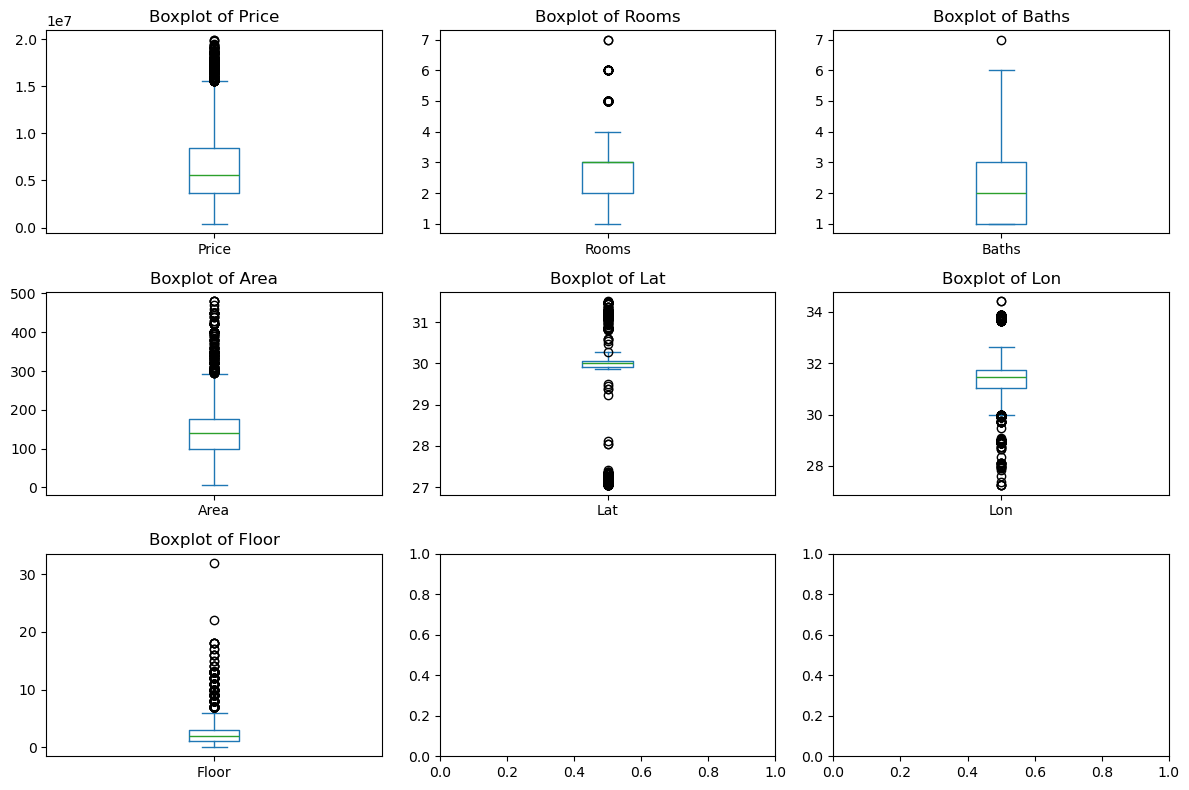

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_data[:6]):
    df[col].plot(kind="box", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [33]:
df["Area"].value_counts().sort_index().tail(10)


Area
400    22
420     9
425     2
430     2
440     3
444     1
450     9
460     1
470     1
480     4
Name: count, dtype: int64

In [34]:
df["Price"].value_counts().sort_index().tail(10)

Price
19065000    1
19200000    2
19305000    1
19305903    1
19366000    1
19390000    1
19500000    1
19750000    1
19865000    1
19950000    1
Name: count, dtype: int64

In [35]:
df["Floor"].value_counts().sort_index().tail(10)

Floor
11     38
12     38
13    116
14      4
15      2
16      4
17      2
18      5
22      1
32      1
Name: count, dtype: int64

In [36]:
# Exploring categorical columns
categorical_data = df.select_dtypes("object")
categorical_data.nunique()

URL              7496
Finishing           5
Governate          12
Neighbourhood    1319
dtype: int64

In [37]:
df["Finishing"].value_counts()

Finishing
سوبر لوكس           2839
نصف تشطيب           1984
اكسترا سوبر لوكس    1747
بدون تشطيب           772
لوكس                 163
Name: count, dtype: int64

In [38]:
df["Governate"].value_counts()

Governate
القاهره           5406
البحر الأحمر      1686
الاسكندرية         277
الساحل الشمالي      97
دمياط               11
السويس              11
الدقهلية             8
العين السخنة         5
الشرقية              1
المنوفية             1
المنيا               1
القليوبية            1
Name: count, dtype: int64

In [39]:
df["Neighbourhood"].value_counts()

Neighbourhood
 حي الكوثر                     564
حي الكوثر                      283
 الاحياء                       229
 مروج                          150
 مبارك 6                       130
                              ... 
ذا بلاتوه                        1
الشطر السابع                     1
اسيا                             1
كمبوند زايد 2000                 1
 المنطقه الخامسه عشر عمارات      1
Name: count, Length: 1319, dtype: int64

## EDA

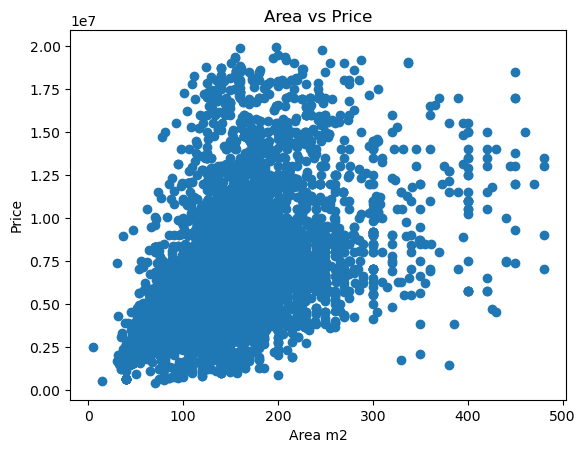

In [40]:
plt.scatter(data=df,x="Area",y="Price")
plt.xlabel("Area m2")
plt.ylabel("Price")
plt.title("Area vs Price");

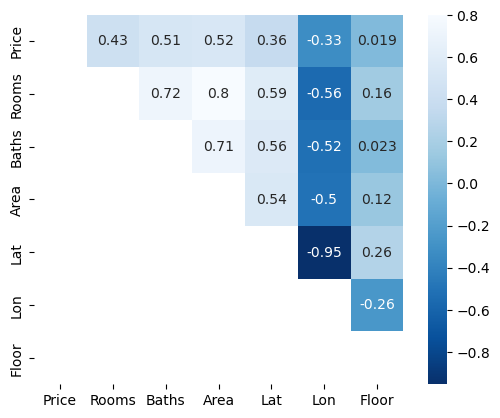

In [42]:
corr = numeric_data.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues_r", annot=True, square=True);